# DÙNG PHƯƠNG PHÁP TÌM ĐIỂM GẤP KHÚC (KNEE) TRÊN BIỂU ĐỒ SCREE PLOT ĐỂ XÁC ĐỊNH CHỌN SỐ LƯỢNG THÀNH PHẦN CHÍNH TRONG PCA MÀ VẪN GIỮ LẠI ĐƯỢC ĐỘ CHÍNH XÁC MONG MUỐN CỦA DỮ LIỆU

In [ ]:
# đọc dữ liệu
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/AirQualityUCI.csv')

In [ ]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [ ]:
import pandas as pd
import numpy as np

# 1. Tổng quan về dữ liệu
print("Tổng quan về dữ liệu:")
print(f"Số dòng (rows): {data.shape[0]}")
print(f"Số cột (columns): {data.shape[1]}\n")

print("Tên các cột và kiểu dữ liệu:")
print(data.dtypes)

print("\nSố lượng giá trị trong mỗi c:")
summary = pd.DataFrame({
    'Total Rows': data.shape[0],
    'Non-Null Values': data.count(),
    'Null Values': data.isnull().sum(),
    'Error Values (-200)': (data == -200).sum(),
    'Unique Values': data.nunique(),
})
print(summary)

print("\nMô tả thống kê cơ bản:")
print(data.describe(include='all'))



Tổng quan về dữ liệu:
Số dòng (rows): 9471
Số cột (columns): 17

Tên các cột và kiểu dữ liệu:
Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

Số lượng giá trị trong mỗi c:
               Total Rows  Non-Null Values  Null Values  Error Values (-200)  \
Date                 9471             9357          114                    0   
Time                 9471             9357          114                    0   
CO(GT)               9471             9357          114                 1683   
PT08.S1(CO)          9471             9357          114                  366   
NMHC(GT)             9471           

In [ ]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Loại bỏ cột không phải dạng số
data = data.select_dtypes(include=[np.number])

# Thay thế giá trị -200 bằng NaN
data = data.replace(-200, np.nan)

# Loại bỏ cột và các dòng có quá nhiều giá trị bị thiếu (loại bỏ các cột có trên 50% và các hàng có trên 30% giá trị bị thiếu)
data = data.loc[:, data.isnull().mean() < 0.5]
data = data[data.isnull().mean(axis=1) < 0.3]

# Điền giá trị thiếu bằng KNN Imputer
imputer = KNNImputer(n_neighbors=5)
data_cleaned = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)




In [ ]:
data_cleaned.shape

(8991, 12)

In [ ]:
data_cleaned.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


xem dữ liệu có phân phối chuẩn hay không (Kolmogorov-Smirnov)

In [ ]:
from scipy.stats import kstest
import pandas as pd
ks_results = []

for column in data_cleaned.columns:
    data = data_cleaned[column].dropna()
    standardized_data = (data - data.mean()) / data.std()
    stat, p_value = kstest(standardized_data, 'norm')
    ks_results.append({
        "Column": column,
        "Statistic": stat,
        "p-value": p_value,
        "Normal Distribution": "Yes" if p_value > 0.05 else "No"
    })

ks_df = pd.DataFrame(ks_results)
print("Kolmogorov-Smirnov Test Results:")
print(ks_df)

Kolmogorov-Smirnov Test Results:
           Column  Statistic        p-value Normal Distribution
0          CO(GT)   0.113805  6.799326e-102                  No
1     PT08.S1(CO)   0.068837   1.726486e-37                  No
2        C6H6(GT)   0.106184   9.967483e-89                  No
3   PT08.S2(NMHC)   0.048061   1.734288e-18                  No
4         NOx(GT)   0.141462  1.910889e-157                  No
5    PT08.S3(NOx)   0.061797   2.725222e-30                  No
6         NO2(GT)   0.042816   9.262633e-15                  No
7    PT08.S4(NO2)   0.018192   5.140818e-03                  No
8     PT08.S5(O3)   0.061296   8.279869e-30                  No
9               T   0.040003   6.142034e-13                  No
10             RH   0.031732   2.671625e-08                  No
11             AH   0.034389   1.130347e-09                  No


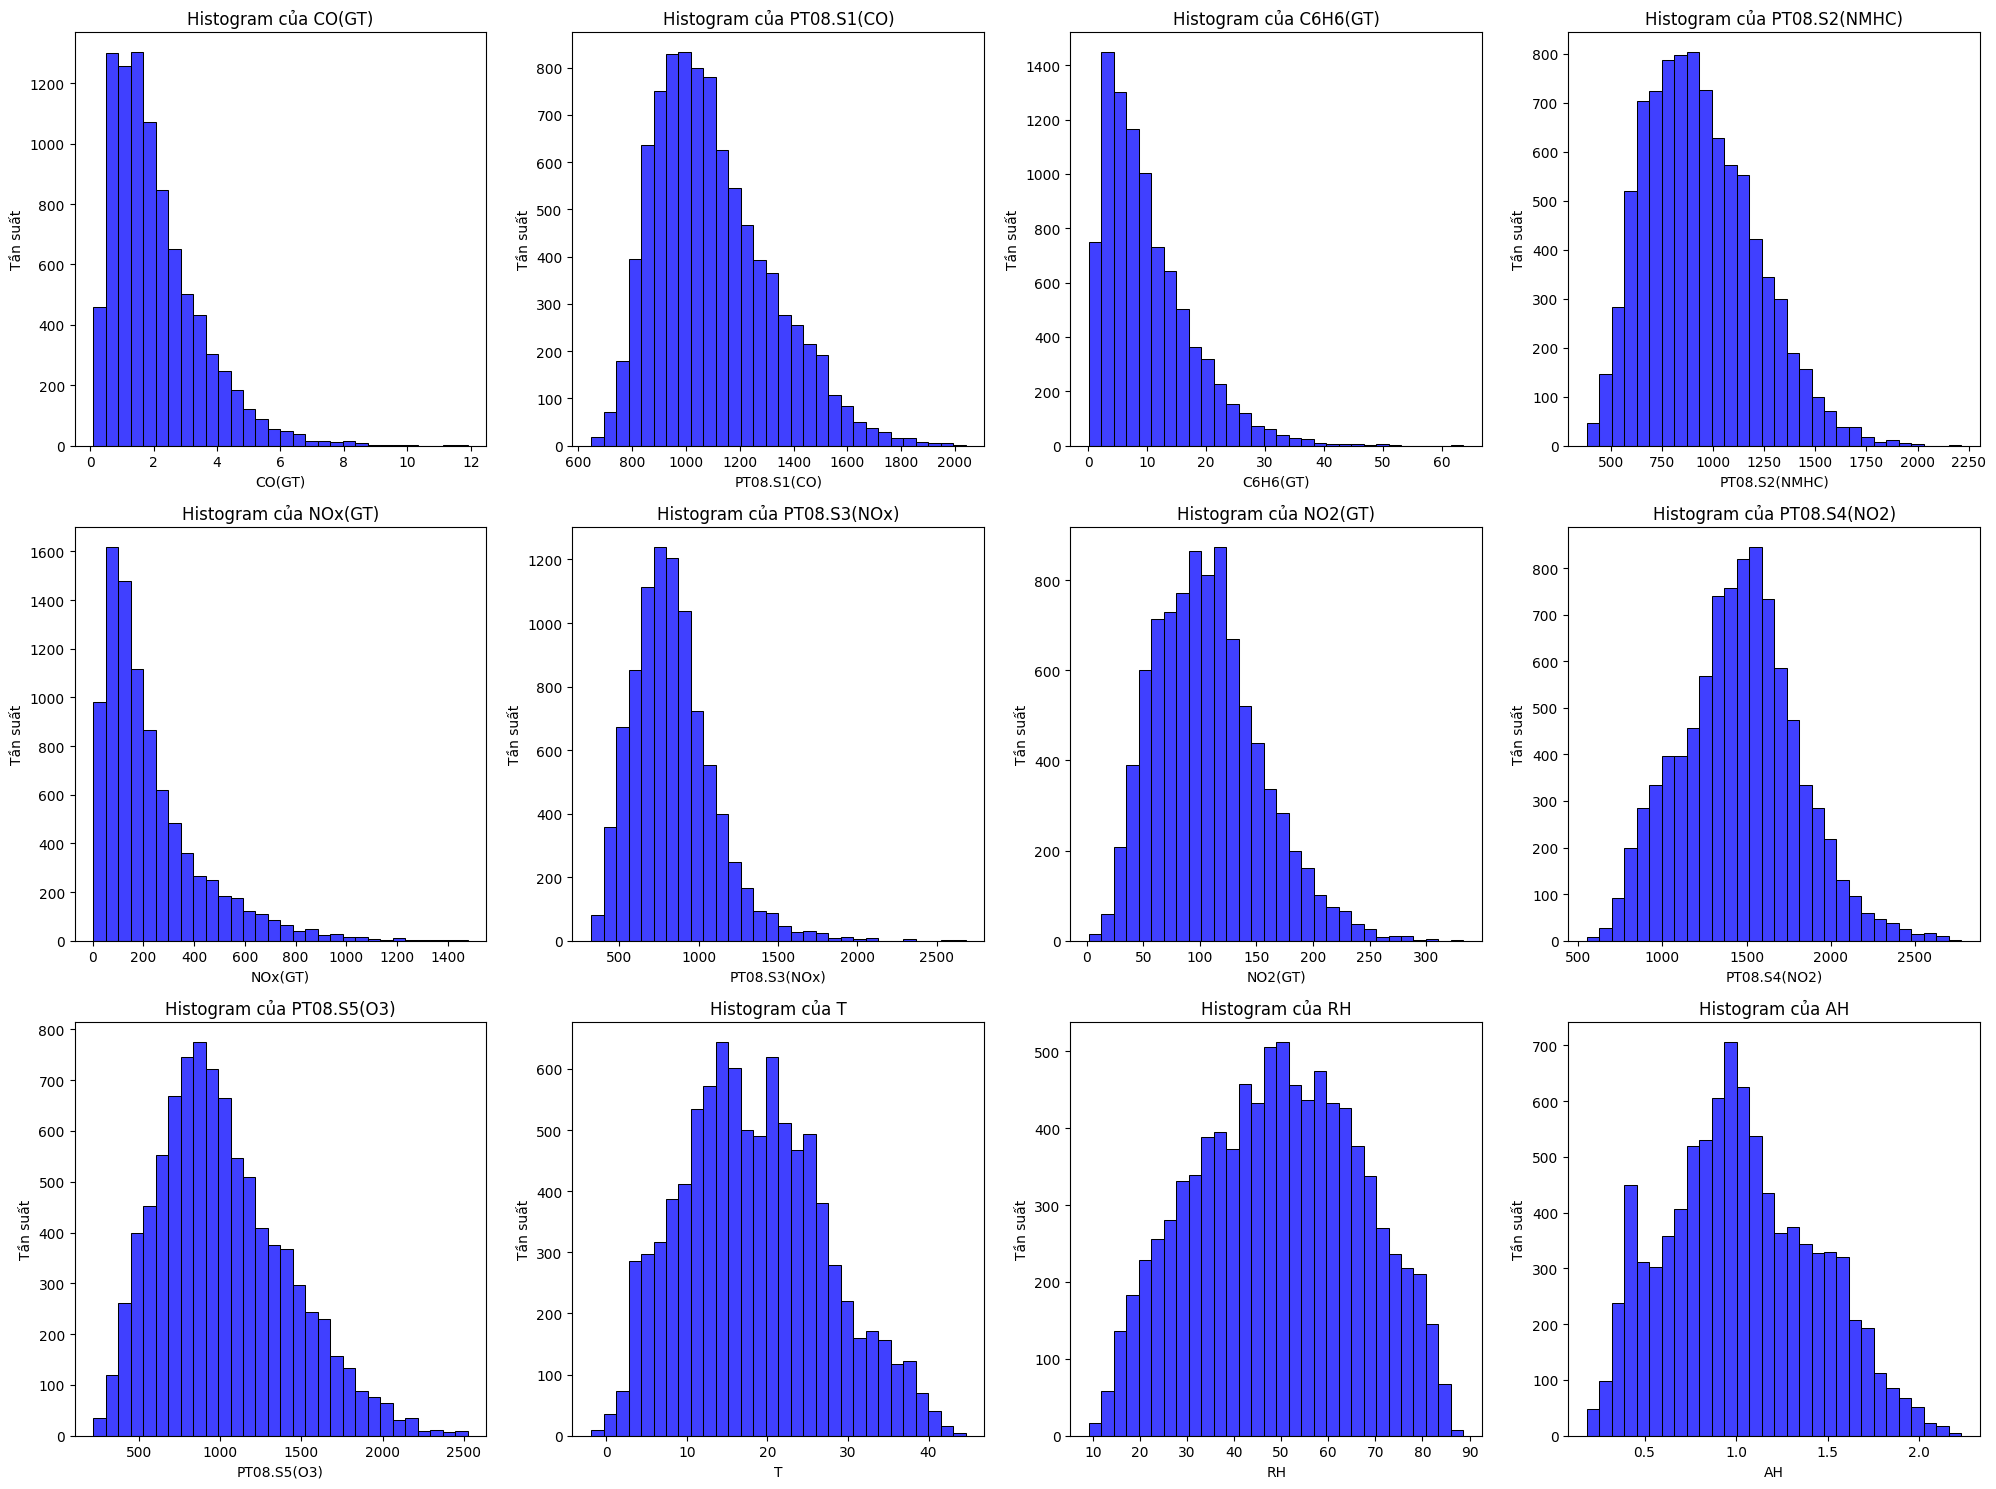

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = data_cleaned.shape[1]
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))
for ax, column in zip(axes.flat, data_cleaned.columns):
    sns.histplot(data_cleaned[column], bins=30, color="blue", ax=ax)
    ax.set_title(f"Histogram của {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Tần suất")
plt.tight_layout()
plt.show()

# xử lý dữ liệu outliers


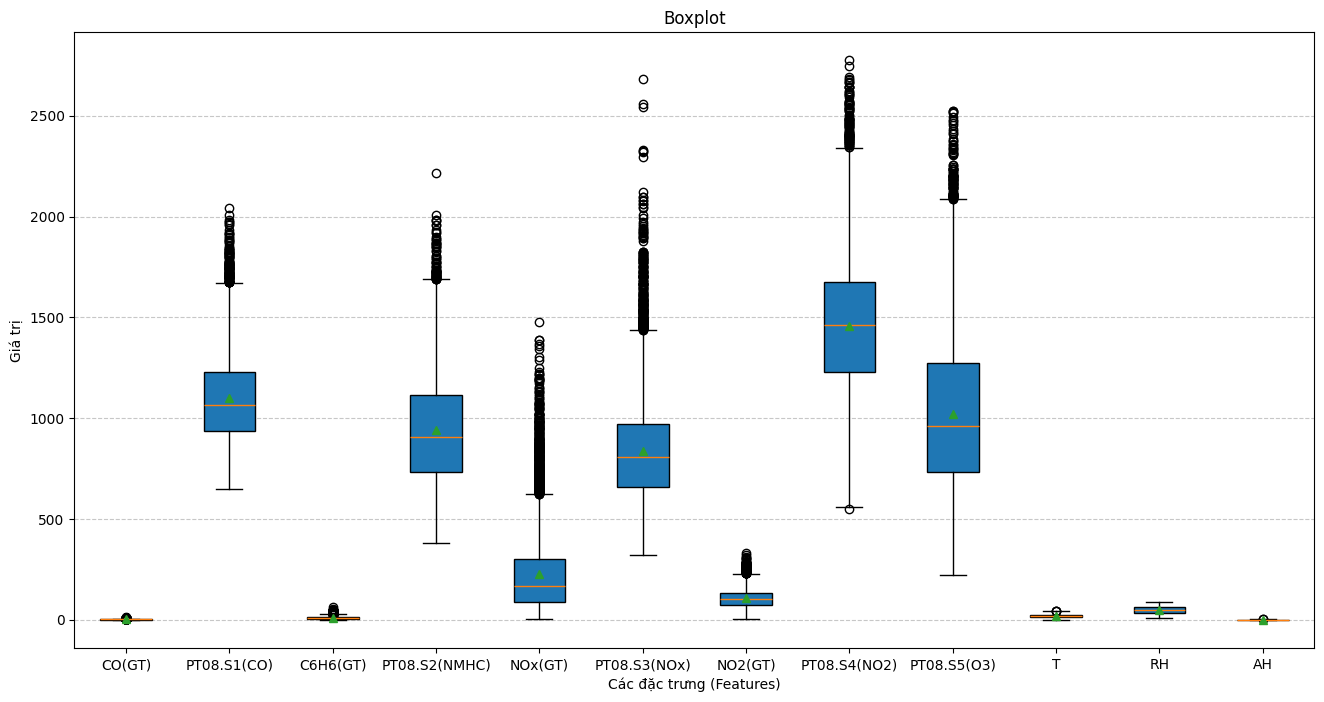

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.boxplot(data_cleaned, labels=data_cleaned.columns, vert=True, patch_artist=True, showmeans=True)

plt.title("Boxplot")
plt.xlabel("Các đặc trưng (Features)")
plt.ylabel("Giá trị")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
Q1 = data_cleaned.quantile(0.25)
Q3 = data_cleaned.quantile(0.75)
IQR = Q3 - Q1

benduoi = Q1 - 1.5 * IQR
bentren = Q3 + 1.5 * IQR

outliers = (data_cleaned < benduoi) | (data_cleaned > bentren)

data_no_outliers = data_cleaned[~outliers.any(axis=1)]

num_outliers = outliers.sum().sum()
percent_outliers = (num_outliers / data_cleaned.size) * 100
print(f"Số lượng outliers: {num_outliers}, chiếm {percent_outliers:.2f}% dữ liệu.")

for column in data_cleaned.columns:
    column_outliers = data_cleaned[column][outliers[column]]
    print(f"Outliers in column '{column}':")
    print(column_outliers)
    print("-" * 50)

Số lượng outliers: 1731, chiếm 1.60% dữ liệu.
Outliers in column 'CO(GT)':
25      6.9
26      6.1
50      6.6
98      5.9
110     5.5
       ... 
8708    7.2
8731    5.9
8732    7.5
8755    5.7
8756    5.5
Name: CO(GT), Length: 274, dtype: float64
--------------------------------------------------
Outliers in column 'PT08.S1(CO)':
25      1776.0
50      1843.0
53      1677.0
97      1808.0
98      1898.0
         ...  
7778    1751.0
8516    1710.0
8731    1726.0
8732    1818.0
8755    1673.0
Name: PT08.S1(CO), Length: 118, dtype: float64
--------------------------------------------------
Outliers in column 'C6H6(GT)':
50      32.6
111     36.7
120     32.1
121     39.2
122     31.0
        ... 
8659    29.7
8707    32.6
8708    32.0
8731    30.8
8732    35.5
Name: C6H6(GT), Length: 228, dtype: float64
--------------------------------------------------
Outliers in column 'PT08.S2(NMHC)':
111     1701.0
121     1754.0
159     1696.0
169     1737.0
971     1776.0
         ...  
6690    

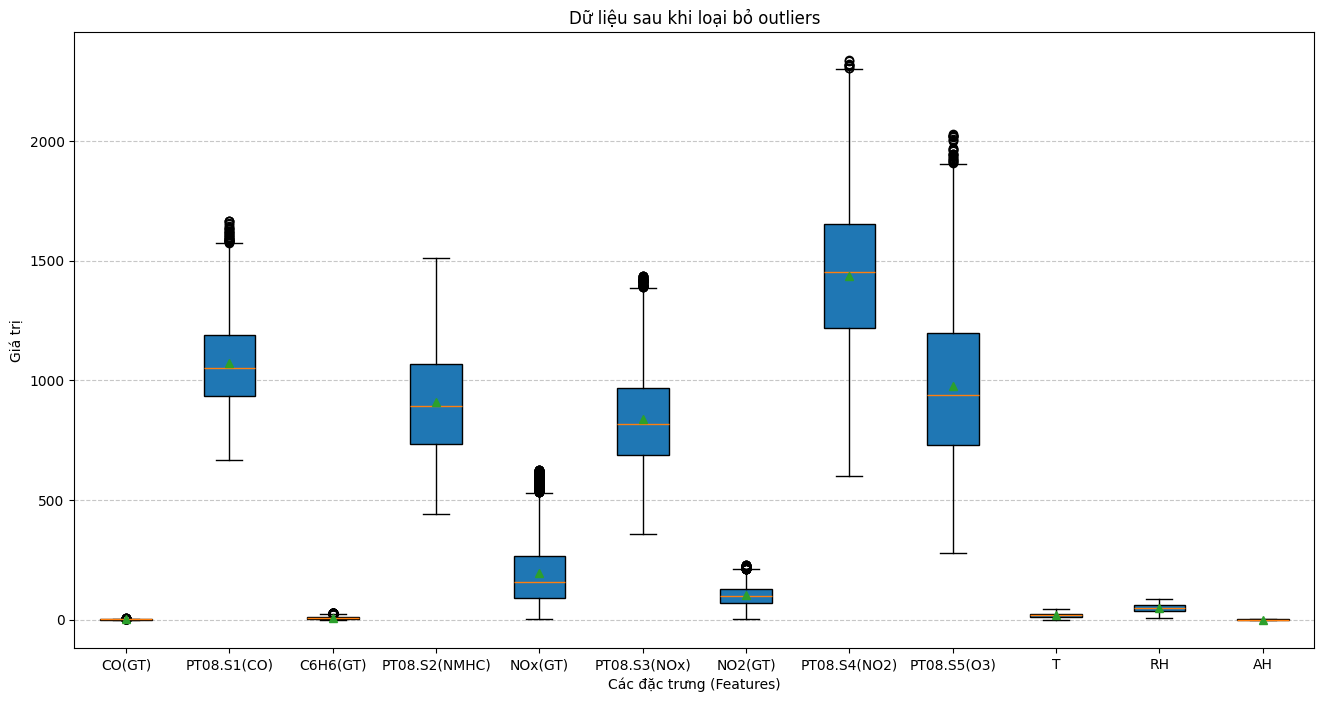

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.boxplot(data_no_outliers, labels=data_no_outliers.columns, vert=True, patch_artist=True, showmeans=True)

plt.title("Dữ liệu sau khi loại bỏ outliers")
plt.xlabel("Các đặc trưng (Features)")
plt.ylabel("Giá trị")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

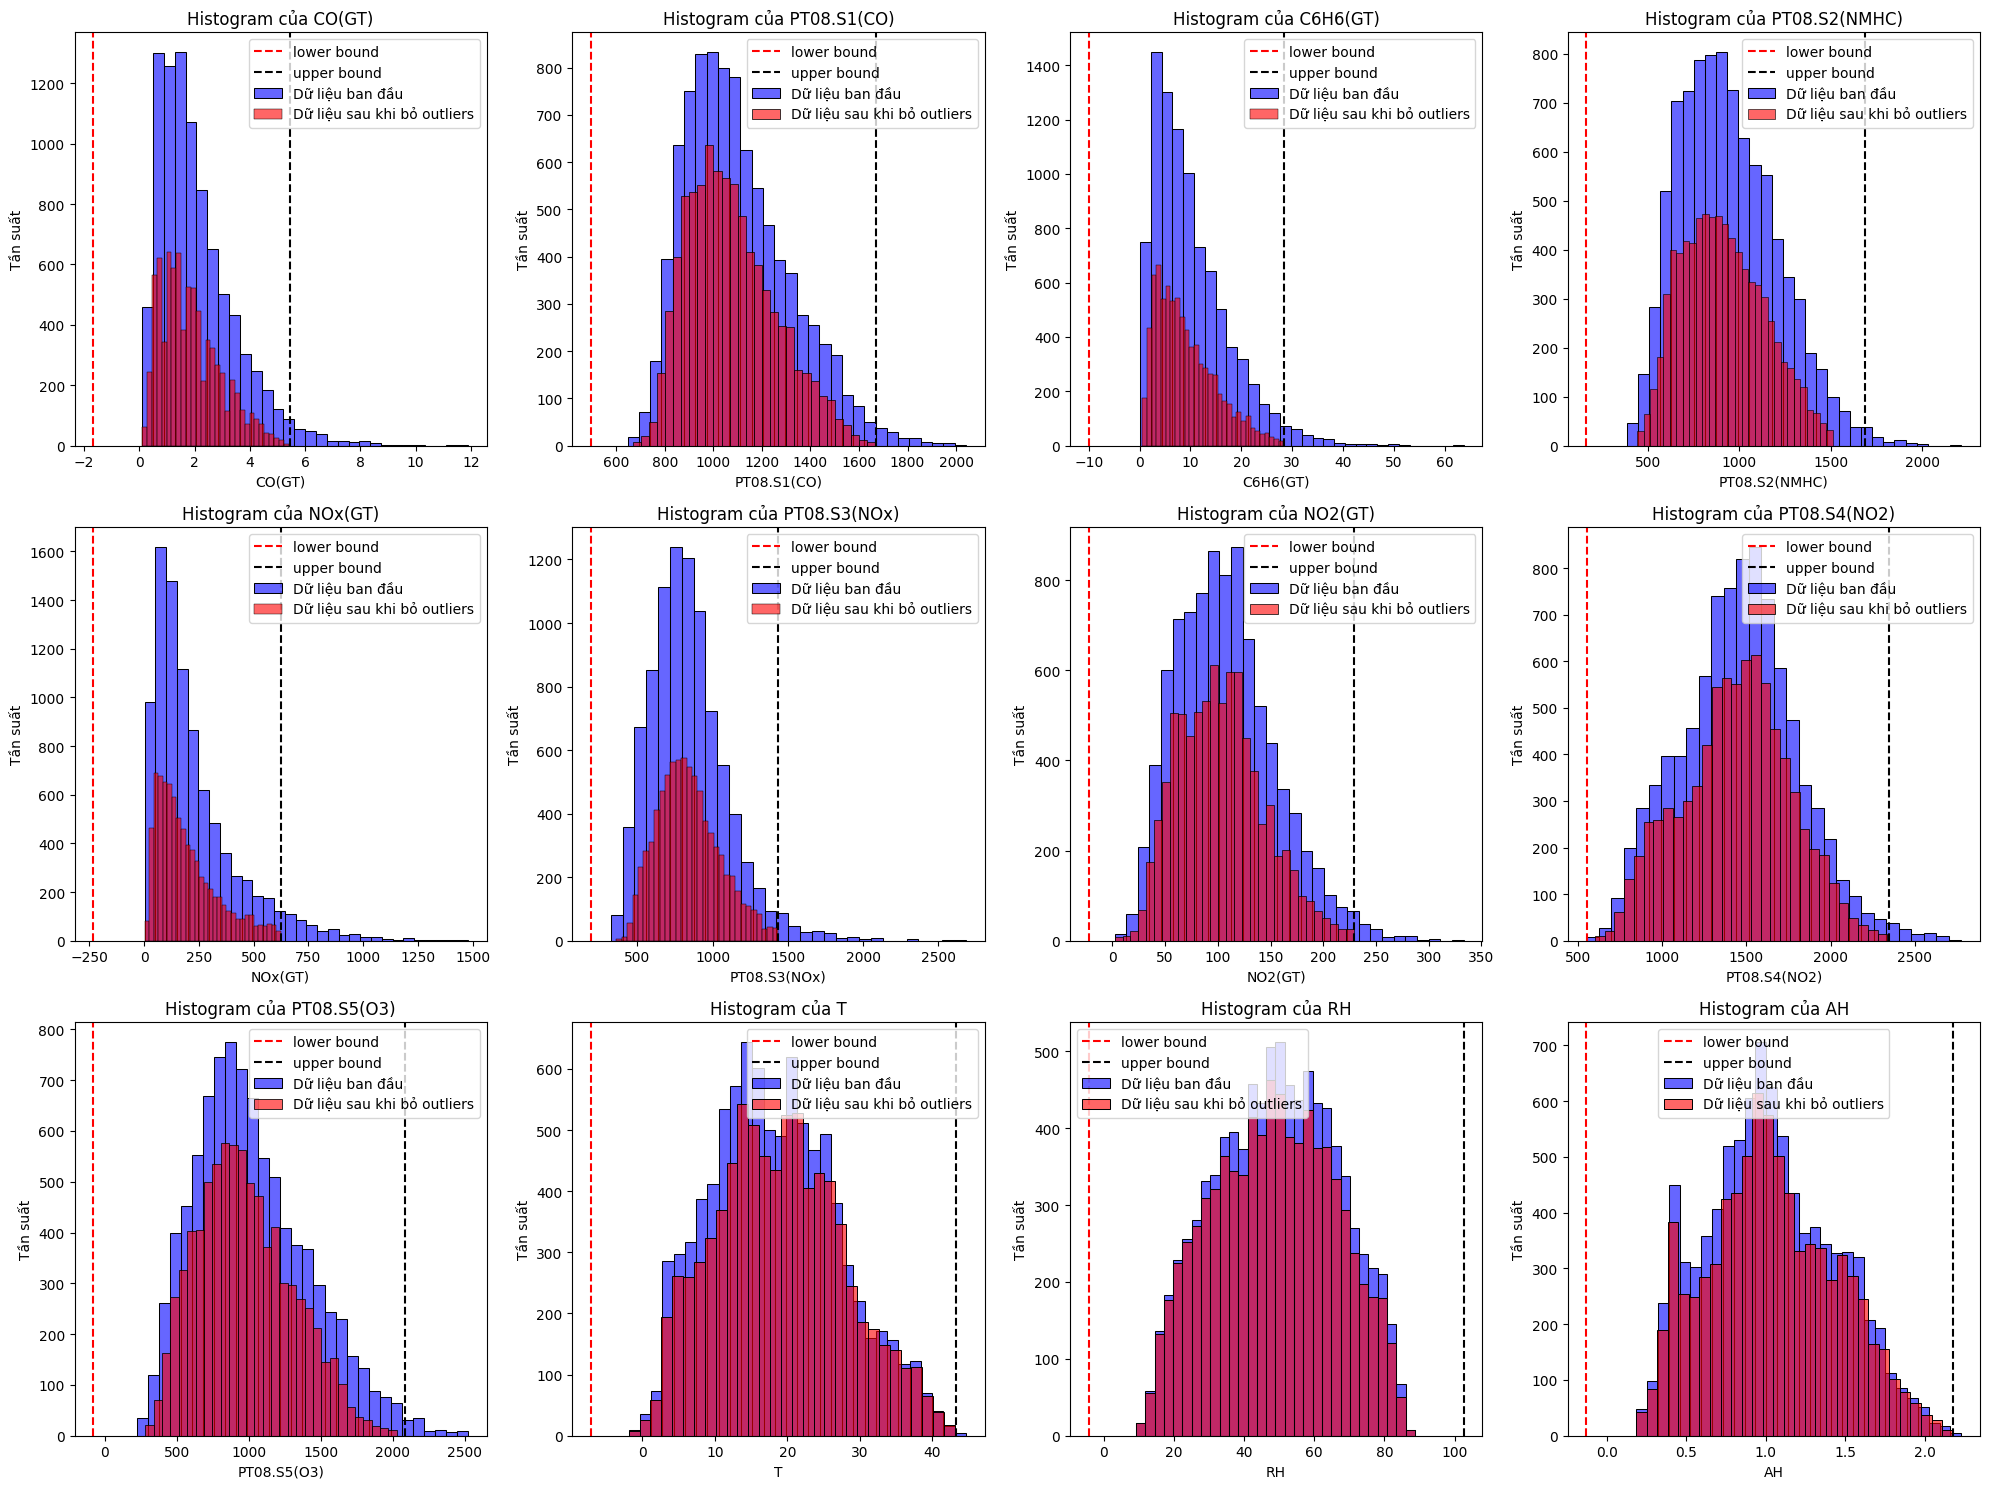

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = data_cleaned.shape[1]
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))

for ax, column in zip(axes.flat, data_cleaned.columns):
    sns.histplot(data_cleaned[column], bins=30, label="Dữ liệu ban đầu", color="blue", alpha=0.6, ax=ax)
    sns.histplot(data_no_outliers[column], bins=30, label="Dữ liệu sau khi bỏ outliers", color="red", alpha=0.6, ax=ax)
    ax.axvline(x=benduoi[column], color='red', linestyle='--', label='lower bound')
    ax.axvline(x=bentren[column], color='black', linestyle='--', label='upper bound')
    ax.set_title(f"Histogram của {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Tần suất")
    ax.legend()
plt.tight_layout()
plt.show()

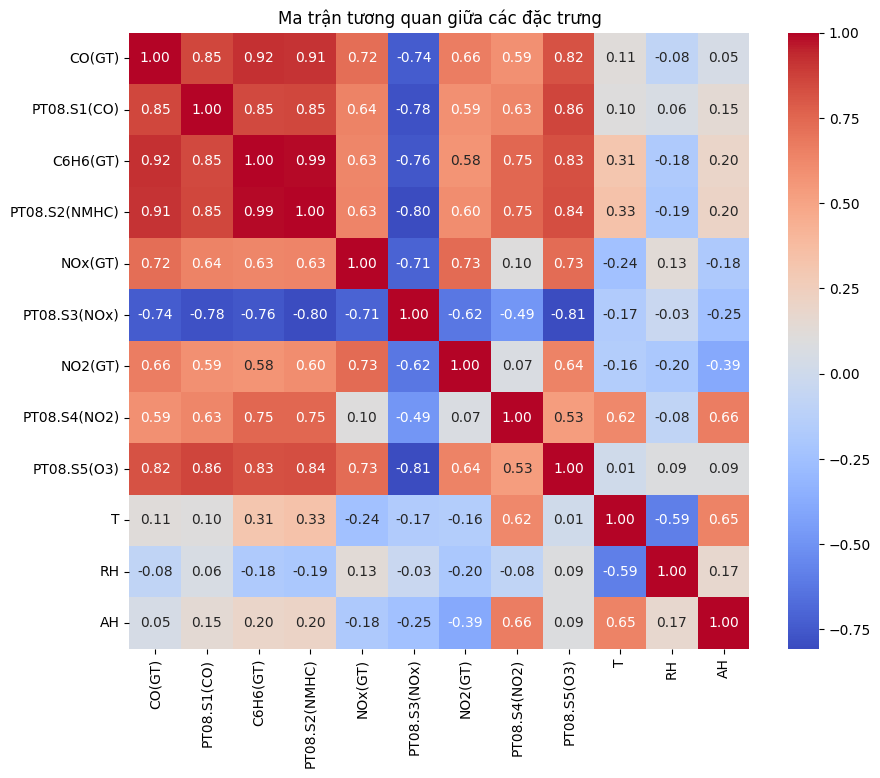

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data_no_outliers.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các đặc trưng")
plt.show()

In [ ]:
### chuẩn hoá dữ liệu
from sklearn.preprocessing import StandardScaler
data_scaled = StandardScaler().fit_transform(data_no_outliers)

In [ ]:
data_scaled.shape

(8065, 12)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data_scaled)
# tính tỷ lệ phương sai mà mỗi thành phần chính giải thích và phương sai tích luỹ
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


In [ ]:
with np.printoptions(precision=2, suppress=True):
    explained_variance_percent = explained_variance * 100
    cumulative_variance_percent = cumulative_variance * 100
    print('tỷ lệ phương sai')
    print(explained_variance_percent)
    print('tỷ lệ phương sai tích luỹ')
    print(cumulative_variance_percent)

tỷ lệ phương sai
[56.11 21.27 11.84  4.01  2.01  1.41  1.11  1.05  0.62  0.29  0.22  0.06]
tỷ lệ phương sai tích luỹ
[ 56.11  77.38  89.22  93.22  95.24  96.65  97.75  98.81  99.42  99.72
  99.94 100.  ]


**tỷ lệ phương sai** : là tỷ lệ mà thành phần chính đó giải thích được bao nhiêu % độ chính xác của dữ liệu góc.

**vd** : thành phần chính thứ nhất là 56,11 => thành phần chính thứ nhất giải thích được 56,11% độ chính xác của dữ liệu gốc.

**phương sai tích luỹ** : phương sai tích luỹ cho ta biết khi lấy số lượng thành phần chính thì giải thích được bao nhiêu % độ chính xác của dữ liệu gốc.

**vd** : khi lấy 2 thành phần chính với thành phần chính thứ 1 giải thích được 56,11% và thành phần chính thứ 2 giải thích được 21,27% thì ta có thể giải thích được độ chính xác của dữ liệu gốc là 56,11% + 21,27% = 77,38%


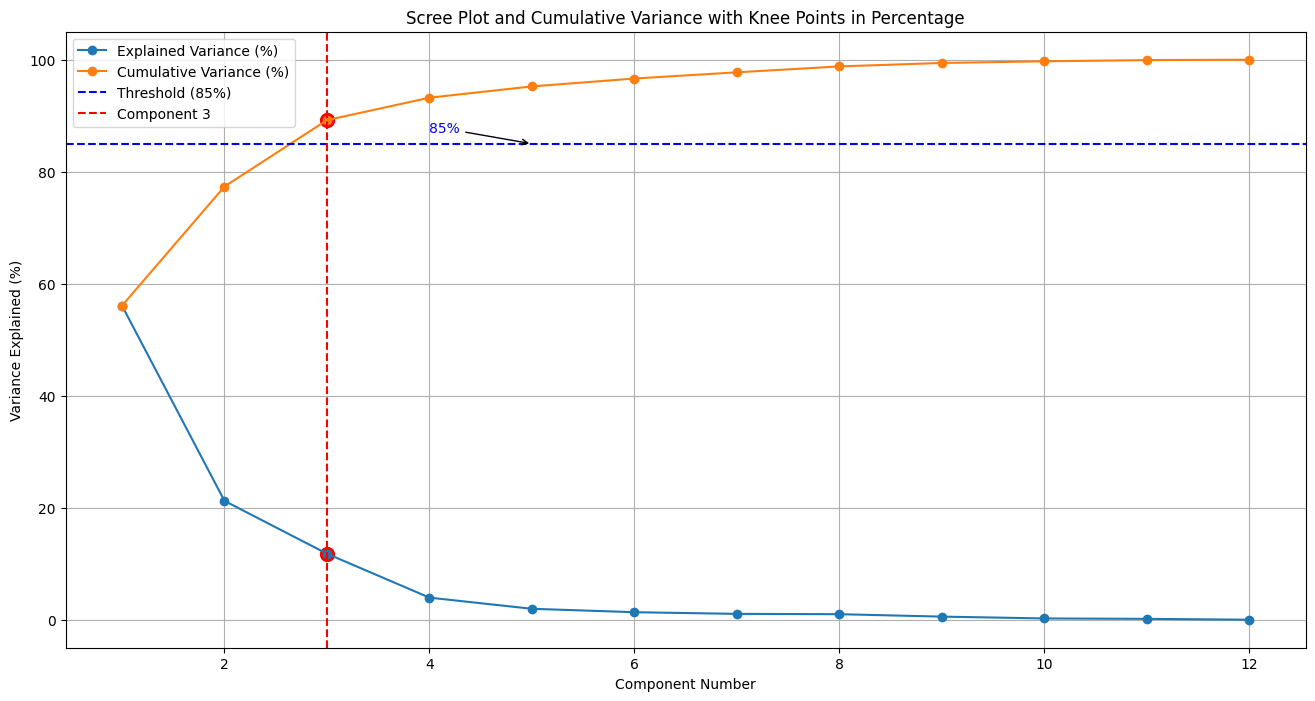

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16, 8))
plt.plot(np.arange(1, len(explained_variance_percent) + 1), explained_variance_percent, marker='o', linestyle='-', label='Explained Variance (%)')
plt.plot(np.arange(1, len(cumulative_variance_percent) + 1), cumulative_variance_percent, marker='o', linestyle='-', label='Cumulative Variance (%)')

threshold = 85
plt.axhline(y=threshold, color='blue', linestyle='--', label=f'Threshold ({threshold}%)')
plt.annotate(f"{threshold}%", xy=(5, threshold), xytext=(4, threshold + 2),
             arrowprops=dict(facecolor='blue', arrowstyle='->'), fontsize=10, color='blue')


component_to_mark = 3
plt.axvline(x = component_to_mark, color='red', linestyle='--', label=f'Component {component_to_mark}')
plt.scatter(component_to_mark, explained_variance_percent[component_to_mark - 1], color='red', s=100)
plt.scatter(component_to_mark, cumulative_variance_percent[component_to_mark - 1], color='red', s=100)
# Thêm nhãn và tiêu đề
plt.xlabel('Component Number')
plt.ylabel('Variance Explained (%)')
plt.title('Scree Plot and Cumulative Variance with Knee Points in Percentage')
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

# THỰC HIỆN PCA VỚI 3 THÀNH PHẦN CHÍNH

Sau khi xác định số lượng thành phần chính phù hợp với độ chính xác mong muốn, tiến hành giảm chiều dữ liệu bằng PCA với số thành phần đã chọn.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Chuẩn hoá dữ liệu
data_scaled = StandardScaler().fit_transform(data_no_outliers)
##########
# Áp dụng PCA với 3 thành phần chính
pca = PCA(n_components=3,random_state=42)
data_pca = pca.fit_transform(data_scaled)

# Tạo DataFrame cho dữ liệu đã chuyển đổi sang không gian thành phần chính
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3'])
###########

# Lấy tỷ lệ phương sai giải thích
explained_variance_ratio = pca.explained_variance_ratio_ * 100
for i in range(len(explained_variance_ratio)):
    for value in [explained_variance_ratio[i]]:
        print(f"Tỷ lệ phương sai giải thích của thành phần chính {i + 1}: {value:.2f}%")
# Tạo DataFrame cho ma trận trọng số của các thành phần chính
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=data_cleaned.columns)
print("\nMa trận trọng số của các thành phần chính:")
print(loadings)

# Xuất dữ liệu đã chuyển đổi (đã giảm số chiều) ra tệp CSV
data_pca_df.to_csv('data_pca_reduced.csv', index=False)

Tỷ lệ phương sai giải thích của thành phần chính 1: 56.11%
Tỷ lệ phương sai giải thích của thành phần chính 2: 21.27%
Tỷ lệ phương sai giải thích của thành phần chính 3: 11.84%

Ma trận trọng số của các thành phần chính:
                    PC1       PC2       PC3
CO(GT)         0.360814 -0.057202 -0.038095
PT08.S1(CO)    0.353197 -0.029661  0.112064
C6H6(GT)       0.369806  0.075646 -0.063461
PT08.S2(NMHC)  0.373624  0.079794 -0.075096
NOx(GT)        0.285212 -0.322349  0.047443
PT08.S3(NOx)  -0.336760  0.027692 -0.097539
NO2(GT)        0.264118 -0.322763 -0.284334
PT08.S4(NO2)   0.260352  0.410928  0.131109
PT08.S5(O3)    0.351170 -0.100465  0.120140
T              0.085348  0.551594 -0.281676
RH            -0.031473 -0.184213  0.788765
AH             0.069446  0.507702  0.388071


In [ ]:
data_pca_df

,PC1,PC2,PC3
0,1.287096,-0.428345,0.014744
1,-0.252194,-0.246200,-0.116341
2,0.320329,-0.690508,0.214642
3,0.661347,-0.922218,0.568691
4,-0.586524,-0.862422,0.472400
...,...,...,...
8060,3.894517,-1.633378,-1.373712
8061,2.126086,-1.099787,-1.974706
8062,1.875770,-0.745201,-2.472381
8063,0.234949,-0.659677,-2.997883


PC1 (Mức Độ Ô Nhiễm Tổng Thể):

	•	Trọng số cao nhất:
	•	CO(GT) (0.360814),
	•	PT08.S1(CO) (0.353197),
	•	C6H6(GT) (0.369806),
	•	PT08.S2(NMHC) (0.373624),
	•	PT08.S5(O3) (0.351170).
	•	Ý nghĩa:
	•	Thành phần chính PC1 tập trung chủ yếu vào các đặc trưng liên quan đến mức độ ô nhiễm không khí.
	•	Các đặc trưng này đại diện cho các chất khí và cảm biến quan trọng phản ánh chất lượng không khí tổng thể.
-> PC1: Tóm lược mức độ ô nhiễm tổng thể.

PC2 (Yếu Tố Thời Tiết):

	•	Trọng số cao nhất:
	•	T (0.551594),
	•	AH (0.507702),
	•	PT08.S4(NO2) (0.410928).
	•	Ý nghĩa:
	•	PC2 đại diện cho tác động của yếu tố thời tiết (nhiệt độ và độ ẩm tuyệt đối) lên chất lượng không khí.
	•	Trọng số dương cao của T và AH cho thấy nhiệt độ và độ ẩm là những yếu tố chính trong thành phần này.
-> PC2: Thể hiện tác động của yếu tố thời tiết.

PC3 (Độ Ẩm Tuyệt Đối và Tương Đối):

	•	Trọng số cao nhất:
	•	RH (0.788765),
	•	AH (0.388071),
	•	T (-0.281676).
	•	Ý nghĩa:
	•	Thành phần chính PC3 tập trung vào các đặc trưng liên quan đến độ ẩm tương đối và tuyệt đối.
	•	Trọng số cao của RH cho thấy độ ẩm tương đối là yếu tố chính trong thành phần này, bên cạnh mối liên hệ với nhiệt độ.
-> PC3: Phản ánh độ ẩm (tương đối và tuyệt đối) trong không khí.

# SO SÁNH GIỮA DỮ LIỆU TRƯỚC VÀ SAU KHI ĐƯỢC GIẢM CHIỀU


kích thước của dữ liệu trước và sau khi PCA

In [ ]:
# Kích thước của bộ dữ liệu trước PCA
print(f"Kích thước của bộ dữ liệu trước PCA: {data_cleaned.shape}")
# Kích thước của bộ dữ liệu sau PCA
print(f"Kích thước của bộ dữ liệu sau PCA: {data_pca_df.shape}")

Kích thước của bộ dữ liệu trước PCA: (8991, 12)
Kích thước của bộ dữ liệu sau PCA: (8065, 3)


In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100
print(f"Phương sai tích lũy sau 3 thành phần chính: {cumulative_variance[-1]:.2f}%")

Phương sai tích lũy sau 3 thành phần chính: 89.22%


Sau khi sử dụng PCA để giảm chiều dữ liệu xuống còn 3 nhưng vẫn giữ được 89.22% độ chính xác

=> phương pháp PCA giúp giảm kích thước dữ liệu nhưng vẫn dữ được độ chính xác của phần lớn dữ liệu

Biểu đồ 3D cho thấy dữ liệu sau khi giảm chiều bằng PCA (với ba thành phần chính: PC1, PC2, PC3) có sự phân bố đồng đều và không còn mối tương quan tuyến tính giữa các chiều. Dữ liệu được trải rộng trong không gian mới của các thành phần chính, cho thấy rằng PCA đã giảm chiều mà vẫn giữ lại phần lớn cấu trúc phân tán tổng quát của dữ liệu gốc.

=> áp dụng PCA cho phép ta giảm xuống 2 hoặc 3 chiều, giúp dễ dàng vẽ biểu đồ và phân tích cấu trúc, cụm dữ liệu trong không gian trực quan hơn.

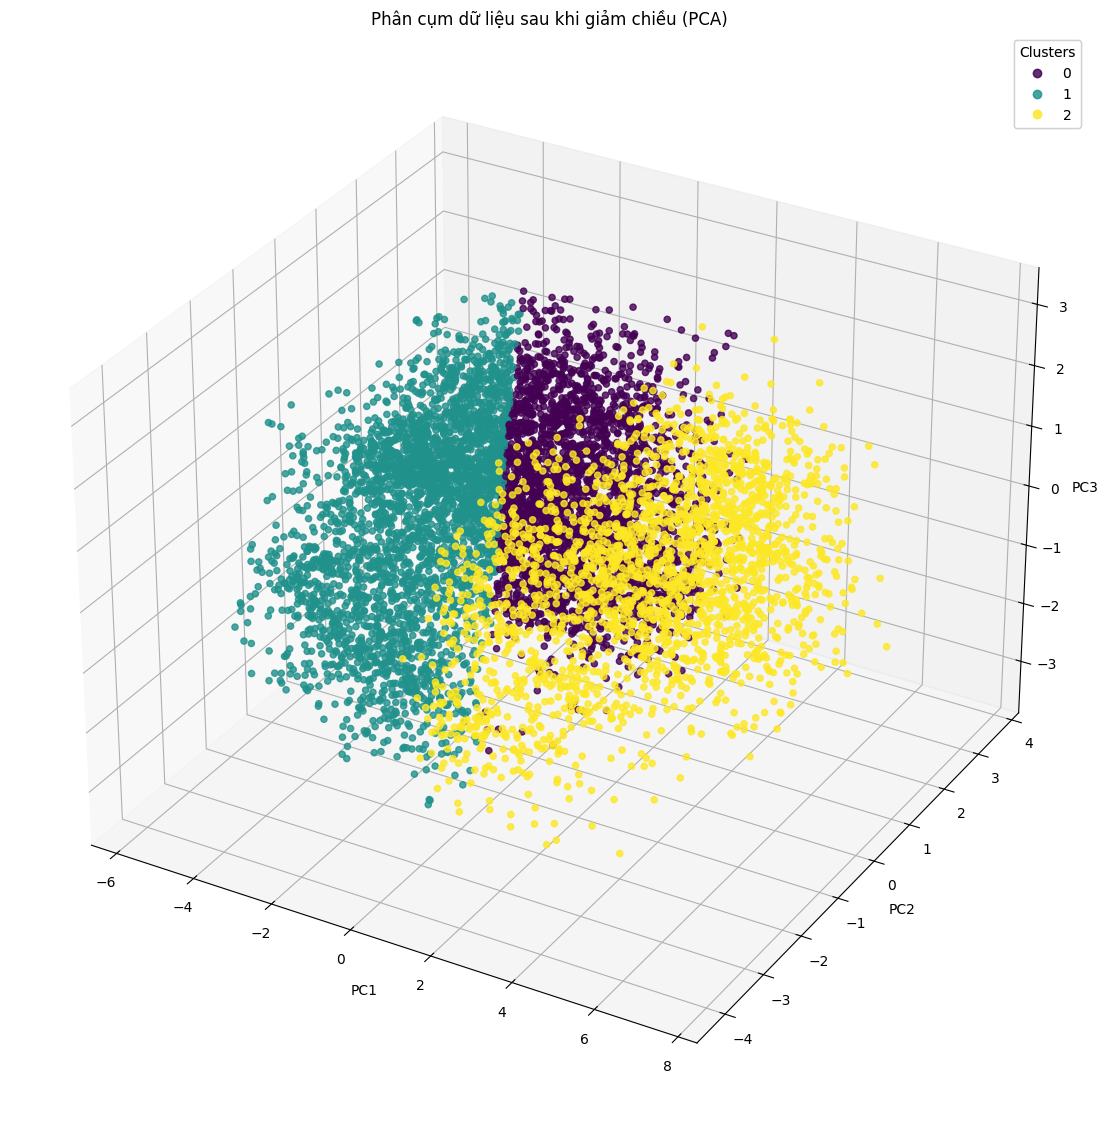

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_pca_df)
labels = kmeans.labels_
fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data_pca_df.iloc[:, 0], data_pca_df.iloc[:, 1], data_pca_df.iloc[:, 2],
                     c=labels, cmap='viridis', label='Clustered Data', alpha=0.8)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Phân cụm dữ liệu sau khi giảm chiều (PCA)')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()